In [11]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import csv


# IRIS DATA

In [3]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data,iris.target
print(X_iris.shape,y_iris.shape)

(150, 4) (150,)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,
                                                test_size=0.2,
                                                random_state=42,
                                                stratify = y_iris)

In [5]:
# try k=1 ~ 25 and record testing accuracy

k_range = range(1,26)
scores=[]
train_acc=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    train_acc.append(knn.score(X_train,y_train))
print(scores)

[0.9666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333]


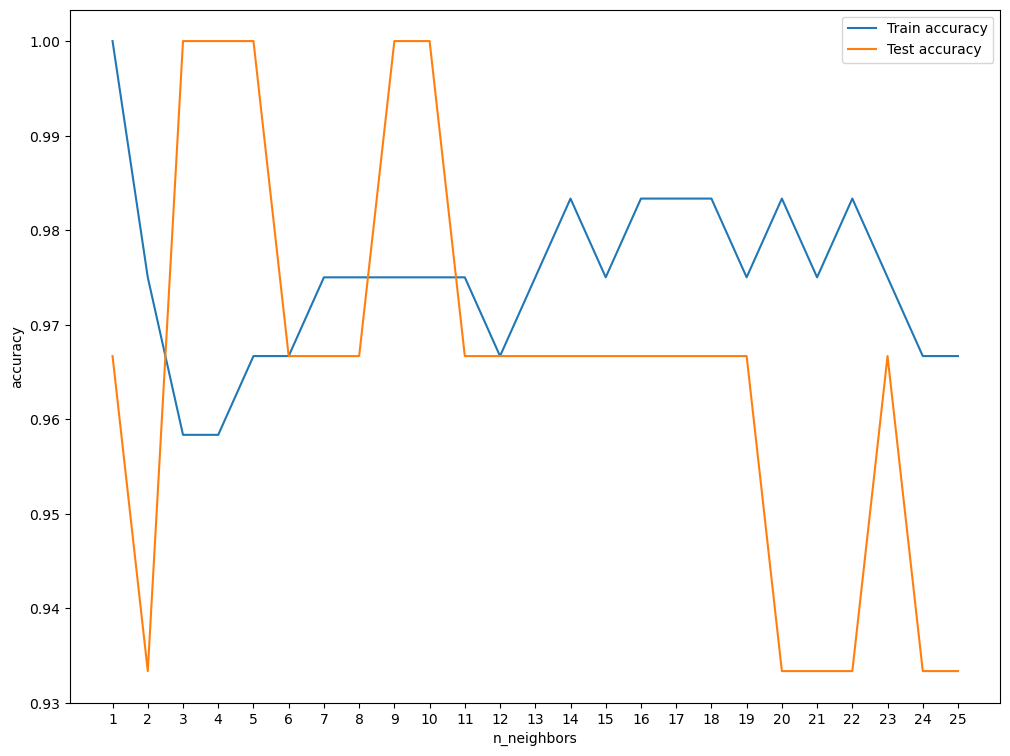

In [6]:
plt.figure(figsize=(12,9))
plt.plot(range(1,26),train_acc,label='Train accuracy')
plt.plot(range(1,26),scores,label='Test accuracy')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(1,26,step=1))
plt.legend()

In [7]:
print(max(scores))
print(scores.index(max(scores)))

1.0
2


### Choose k=3 for best parameter

In [12]:
knn_final = KNeighborsClassifier(n_neighbors=3 )
knn_final.fit(X_train,y_train)
y_pred = knn_final.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree

In [16]:
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7], 
                     'min_samples_split': [2,4,6,8,10]}]

scores=['recall']
for score in scores:
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(DecisionTreeClassifier(),tuned_parameters,
                      scoring = f'{score}_macro')
    clf.fit(X_train,y_train)
    print("Best parameters set found : ",clf.best_params_)
    print("Grid scores : ")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean,std,params in zip(means,stds,clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")



Tuning hyperparameters for recall

Best parameters set found :  {'max_depth': 4, 'min_samples_split': 2}
Grid scores : 
0.667 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 2}
0.667 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 4}
0.667 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 6}
0.667 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 8}
0.667 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 10}
0.925 (+/-0.062) for {'max_depth': 2, 'min_samples_split': 2}
0.925 (+/-0.062) for {'max_depth': 2, 'min_samples_split': 4}
0.925 (+/-0.062) for {'max_depth': 2, 'min_samples_split': 6}
0.925 (+/-0.062) for {'max_depth': 2, 'min_samples_split': 8}
0.925 (+/-0.062) for {'max_depth': 2, 'min_samples_split': 10}
0.933 (+/-0.041) for {'max_depth': 3, 'min_samples_split': 2}
0.933 (+/-0.041) for {'max_depth': 3, 'min_samples_split': 4}
0.933 (+/-0.041) for {'max_depth': 3, 'min_samples_split': 6}
0.933 (+/-0.041) for {'max_depth': 3, 'min_samples_split': 8}
0.933 (+/

In [17]:
dt = DecisionTreeClassifier(max_depth=4,min_samples_split=2)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 2 1 1 0]


In [18]:
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy : {:.2f}".format(acc))

Test set accuracy : 0.93


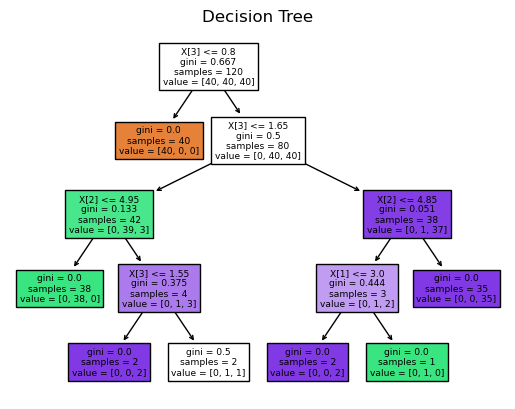

In [19]:
plt.figure()
clf = DecisionTreeClassifier(max_depth=4,min_samples_split=2).fit(X_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decision Tree")
plt.show()

# Treasury Squeeze Data

In [20]:
df = pd.read_csv('/Users/han-eunbi/Desktop/UIUC/23Spring/IE517/Treasury Squeeze raw score data.csv',header=None)
df = df.drop([0,1],axis=1)
df.rename(columns=df.iloc[0],inplace=True)
df = df.drop([0],axis=0)
X, y = df.loc[:,['price_crossing', 'price_distortion', 'roll_start', 'roll_heart',
       'near_minus_next', 'ctd_last_first', 'ctd1_percent', 'delivery_cost',
       'delivery_ratio']],df.loc[:,['squeeze']] 

In [21]:
X = np.array(X)
y = np.array(y['squeeze'])
X,y = X[:,:2],y

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

(675, 2) (675,)


## KNN

In [23]:
k_range = range(1,26)
scores=[]
train_acc=[]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    train_acc.append(knn.score(X_train,y_train))
print(scores)

[0.48444444444444446, 0.5688888888888889, 0.5733333333333334, 0.6044444444444445, 0.5688888888888889, 0.6266666666666667, 0.5911111111111111, 0.6222222222222222, 0.5733333333333334, 0.6133333333333333, 0.5822222222222222, 0.5911111111111111, 0.5777777777777777, 0.5866666666666667, 0.56, 0.5644444444444444, 0.5555555555555556, 0.5377777777777778, 0.56, 0.5377777777777778, 0.5466666666666666, 0.56, 0.5644444444444444, 0.5555555555555556, 0.5555555555555556]


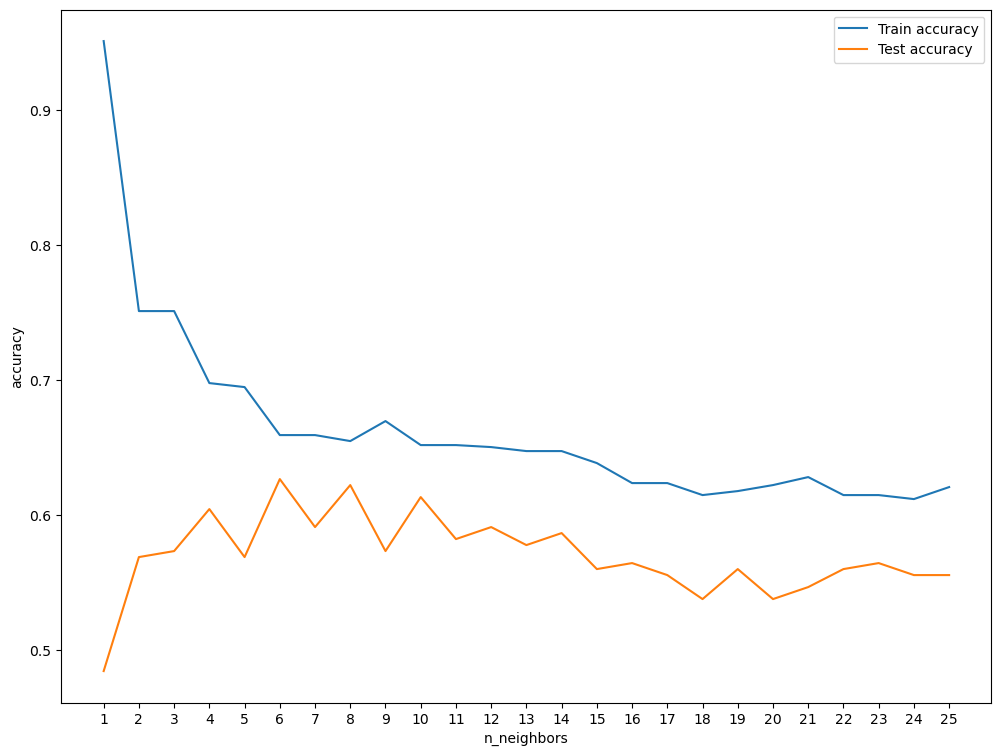

In [24]:
plt.figure(figsize=(12,9))
plt.plot(range(1,26),train_acc,label='Train accuracy')
plt.plot(range(1,26),scores,label='Test accuracy')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(1,26,step=1))
plt.legend()

In [25]:
print(max(scores))
print(scores.index(max(scores)))

0.6266666666666667
5


In [26]:
#choose k=5
#generate confusion matrix and classification report
knn_final = KNeighborsClassifier(n_neighbors=5 )
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[99 37]
 [63 26]]
              precision    recall  f1-score   support

       FALSE       0.61      0.73      0.66       136
        TRUE       0.41      0.29      0.34        89

    accuracy                           0.56       225
   macro avg       0.51      0.51      0.50       225
weighted avg       0.53      0.56      0.54       225



In [1]:
print("My name is Eunbi Han")
print("My NetID is: eunbih2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Eunbi Han
My NetID is: eunbih2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
